# Final Project
## LSTM: Prediction on bike sharing demand

In [1]:
# Import

import folium
from folium.plugins import MarkerCluster

# data set
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# LSTM
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn import metrics
%matplotlib inline

### Importing the merged dataset

In [2]:
#dataset = pd.read_csv('Joint_dataframe.csv')

dataset = pd.read_csv(
    'April_to_June_3_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

# exclude timestamp column
#dataset = dataset.loc[:, dataset.columns!='timestamp']

In [3]:
dataset = dataset.drop(["index",'is_holiday','is_weekend'], axis = 1)
dataset = dataset.dropna(axis=0, how='any')
dataset

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,17,39,2,-22.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.197574,51.4996
2016-04-01,42,24,3,18.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.084606,51.5213
2016-04-01,51,30,4,21.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.120974,51.5301
2016-04-01,44,71,5,-27.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.156876,51.4931
2016-04-01,48,38,6,10.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.144229,51.5181
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-30,1,109,167,-108.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.147624,51.4940
2016-06-30,3,17,168,-14.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.195456,51.5004
2016-06-30,1,30,169,-29.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.165164,51.5147


In [4]:
location = pd.read_csv("Cycle hire docking stations.csv")

In [5]:
#dataset.to_csv (r'C:Desktop\dataframe.csv', index = False, header=True)

## Plotting

In [6]:
def plot_graph(y_train, y_train_inv, y_test_inv, y_pred_inv, i):

    ## Print heading
    plt.title( 'Station Id: %d' % (i))
    plt.plot(np.arange(0, len(y_train)), y_train_inv, color='green', label="History")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv, color='blue', marker='.', label="Actual")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv, color='red', marker='.', label="Prediction")
    plt.ylabel('Bike Count')
    plt.xlabel('Time Step')
    plt.legend()
    #plt.show();
    
    return plt.show();

## Error calculation

In [7]:
from sklearn import metrics

In [8]:
def get_MAE(y_test_inv, y_pred_inv):
    MAE = metrics.mean_absolute_error(y_test_inv, y_pred_inv)
    return MAE

In [9]:
def get_MSE(y_test_inv, y_pred_inv):
    MSE = metrics.mean_squared_error(y_test_inv, y_pred_inv)
    return MSE

In [10]:
def get_RMSE(y_test_inv, y_pred_inv):
    RMSE = np.sqrt(metrics.mean_squared_error(y_test_inv, y_pred_inv))
    return RMSE

In [11]:
def get_RMAE(y_test_inv, y_pred_inv):
    RMAE = np.sqrt(metrics.mean_absolute_error(y_test_inv, y_pred_inv))
    return RMAE

In [12]:
def print_error_calculation(y_test_inv, y_pred_inv):

    print('MAE:', get_MAE(y_test_inv, y_pred_inv))
    print('MSE:', get_MSE(y_test_inv, y_pred_inv))
    print('RMSE:', get_RMSE(y_test_inv, y_pred_inv))
    print('RMAE:', get_RMAE(y_test_inv, y_pred_inv))

### Datasets for each stations

In [13]:
# Extract number of bikes leaving to the station
## for loop with 800 station
## put that info to 800 datasets

obj = dataset.groupby('Station Id')

In [14]:
obj.get_group(1)

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-02,13,22,1,-9.0,10.729167,9.458333,62.125000,14.833333,2.0,-0.109971,51.5292
2016-04-03,27,22,1,5.0,11.562500,11.041667,77.541667,11.312500,3.0,-0.109971,51.5292
2016-04-04,52,20,1,32.0,11.083333,10.500000,77.520833,13.583333,4.0,-0.109971,51.5292
2016-04-05,75,12,1,63.0,11.583333,10.916667,65.708333,14.916667,5.0,-0.109971,51.5292
2016-04-06,41,23,1,18.0,9.500000,7.208333,65.812500,26.437500,6.0,-0.109971,51.5292
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-25,11,9,1,2.0,16.062500,16.062500,73.458333,13.562500,25.0,-0.109971,51.5292
2016-06-26,48,26,1,22.0,16.604167,16.604167,71.145833,19.270833,26.0,-0.109971,51.5292
2016-06-27,23,22,1,1.0,18.062500,18.062500,68.958333,16.041667,27.0,-0.109971,51.5292


In [15]:
# add datasets to list

df = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]

#[35,79,80,179,198,205,237,259,283,285,342,369,385,413,414,415,416,417,418,422,429,434,438,439,493,497,
           #502,525,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df.append(obj.get_group(i))

### Graph of station 1

[Text(0.5, 0, 'timestamp'), Text(0, 0.5, 'In')]

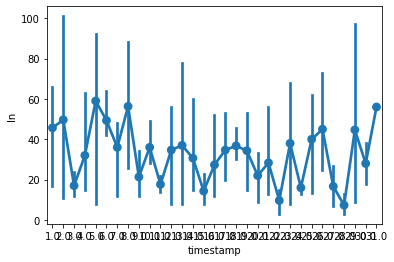

In [16]:
ax = sns.pointplot(x = 'date', y = "In", data = df[1]);
ax.set(xlabel = 'timestamp', ylabel = 'In')

## Comparison

In [17]:
# determine which error is to be used to compare it with, 
# make an array with that error calculated, 
# work out mean , ... , to determine which method is more appropreiate.

# LSTM (Long short-term memory neural networks)

In [18]:
# look for 'time_stemps' of history values
def createDataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        data = X.iloc[i:(i + time_steps)].values
        Xs.append(data)        
        ys.append(y.iloc[i + time_steps])
        
    return np.array(Xs), np.array(ys)

## StandardScaler

/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/1593474360.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

Epoch 1/20
2/2 [==============================] - 4s 611ms/step - loss: 1.2993 - val_loss: 1.4016
Epoch 2/20
2/2 [==============================] - 0s 23ms/step - loss: 1.1400 - val_loss: 1.5429
Epoch 3/20
2/2 [==============================] - 0s 23ms/step - loss: 1.1044 - val_loss: 1.4003
Epoch 4/20
2/2 [==============================] - 0s 22ms/step - loss: 0.8684 - val_loss: 1.2401
Epoch 5/20
2/2 [==============================] - 0s 24ms/step - loss: 0.8164 - val_loss: 1.1691
Epoch 6/20
2/2 [==============================] - 0s 25ms/step - loss: 1.0805 - val_loss: 1.1932
Epoch 7/20
2/2 [==============================] - 0s 23ms/step - loss: 0.7765 - val_loss: 1.2988
Epoch 8/20
2/2 [==============================] - 0s 23ms/step - loss: 0.8273 - val_loss: 1.4870
Epoch 9/20
2/2 [==============================] - 0s 23ms/step - loss: 0.7589 - val_loss: 1.6282
Epoch 10/20
2/2 [==============================] - 0s 23ms/step - loss: 0.7794 - val_loss: 1.6530
Epoch 11/20
2/2 [===========

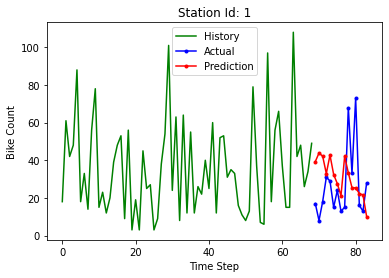

MAE: 18.466963259379067
MSE: 509.56434616628013
RMSE: 22.573531982529452
RMAE: 4.297320474362957
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/1593474360.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

2/2 [==============================] - 4s 669ms/step - loss: 0.7525 - val_loss: 2.4690
Epoch 2/20
2/2 [==============================] - 0s 28ms/step - loss: 0.7622 - val_loss: 2.8075
Epoch 3/20
2/2 [==============================] - 0s 25ms/step - loss: 0.6666 - val_loss: 3.0392
Epoch 4/20
2/2 [==============================] - 0s 26ms/step - loss: 0.6943 - val_loss: 3.0364
Epoch 5/20
2/2 [==============================] - 0s 27ms/step - loss: 0.5408 - val_loss: 2.8720
Epoch 6/20
2/2 [==============================] - 0s 25ms/step - loss: 0.5991 - val_loss: 2.7071
Epoch 7/20
2/2 [==============================] - 0s 26ms/step - loss: 0.4957 - val_loss: 2.6371
Epoch 8/20
2/2 [==============================] - 0s 28ms/step - loss: 0.5088 - val_loss: 2.6558
Epoch 9/20
2/2 [==============================] - 0s 28ms/step - loss: 0.4529 - val_loss: 2.7630
Epoch 10/20
2/2 [==============================] - 0s 28ms/step - loss: 0.4777 - val_loss: 2.7799
Epoch 11/20
2/2 [======================

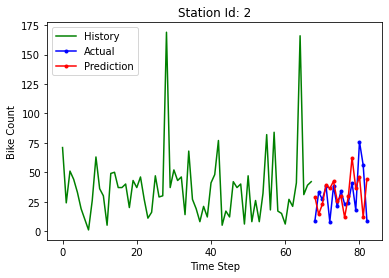

MAE: 16.820653915405273
MSE: 443.80693515492385
RMSE: 21.066725781547635
RMAE: 4.101299052179111
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/1593474360.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

2/2 [==============================] - 4s 659ms/step - loss: 1.1074 - val_loss: 5.3333
Epoch 2/20
2/2 [==============================] - 0s 28ms/step - loss: 0.6476 - val_loss: 5.9789
Epoch 3/20
2/2 [==============================] - 0s 26ms/step - loss: 0.7058 - val_loss: 6.1813
Epoch 4/20
2/2 [==============================] - 0s 26ms/step - loss: 0.7253 - val_loss: 5.9551
Epoch 5/20
2/2 [==============================] - 0s 26ms/step - loss: 0.6278 - val_loss: 5.6499
Epoch 6/20
2/2 [==============================] - 0s 28ms/step - loss: 0.5110 - val_loss: 5.4547
Epoch 7/20
2/2 [==============================] - 0s 26ms/step - loss: 0.4967 - val_loss: 5.4346
Epoch 8/20
2/2 [==============================] - 0s 27ms/step - loss: 0.5459 - val_loss: 5.6375
Epoch 9/20
2/2 [==============================] - 0s 25ms/step - loss: 0.5118 - val_loss: 6.0249
Epoch 10/20
2/2 [==============================] - 0s 28ms/step - loss: 0.4584 - val_loss: 6.5176
Epoch 11/20
2/2 [======================

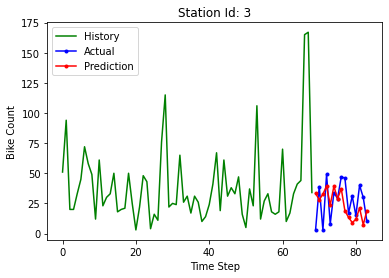

MAE: 14.538856983184814
MSE: 305.07916314025385
RMSE: 17.466515483640514
RMAE: 3.812985311168247
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/1593474360.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

2/2 [==============================] - 4s 653ms/step - loss: 0.6719 - val_loss: 4.3465
Epoch 2/20
2/2 [==============================] - 0s 26ms/step - loss: 0.6621 - val_loss: 4.9982
Epoch 3/20
2/2 [==============================] - 0s 26ms/step - loss: 0.6664 - val_loss: 5.9018
Epoch 4/20
2/2 [==============================] - 0s 27ms/step - loss: 0.6357 - val_loss: 6.3612
Epoch 5/20
2/2 [==============================] - 0s 26ms/step - loss: 0.5544 - val_loss: 6.3237
Epoch 6/20
2/2 [==============================] - 0s 27ms/step - loss: 0.5592 - val_loss: 6.1447
Epoch 7/20
2/2 [==============================] - 0s 29ms/step - loss: 0.5796 - val_loss: 6.0641
Epoch 8/20
2/2 [==============================] - 0s 39ms/step - loss: 0.5261 - val_loss: 6.1820
Epoch 9/20
2/2 [==============================] - 0s 48ms/step - loss: 0.4391 - val_loss: 6.1804
Epoch 10/20
2/2 [==============================] - 0s 29ms/step - loss: 0.4639 - val_loss: 6.1181
Epoch 11/20
2/2 [======================

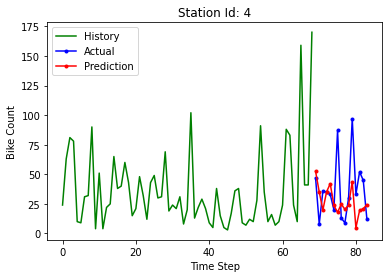

MAE: 20.70091002782186
MSE: 775.5648660137773
RMSE: 27.84896525930142
RMAE: 4.549825274427784
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/1593474360.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

2/2 [==============================] - 4s 692ms/step - loss: 1.4412 - val_loss: 0.8079
Epoch 2/20
2/2 [==============================] - 0s 37ms/step - loss: 1.1853 - val_loss: 0.5555
Epoch 3/20
2/2 [==============================] - 0s 33ms/step - loss: 0.9307 - val_loss: 0.6158
Epoch 4/20
2/2 [==============================] - 0s 38ms/step - loss: 1.0321 - val_loss: 0.5954
Epoch 5/20
2/2 [==============================] - 0s 35ms/step - loss: 0.8060 - val_loss: 0.5641
Epoch 6/20
2/2 [==============================] - 0s 30ms/step - loss: 0.7697 - val_loss: 0.5960
Epoch 7/20
2/2 [==============================] - 0s 35ms/step - loss: 0.8602 - val_loss: 0.6534
Epoch 8/20
2/2 [==============================] - 0s 37ms/step - loss: 0.8335 - val_loss: 0.6501
Epoch 9/20
2/2 [==============================] - 0s 39ms/step - loss: 0.7310 - val_loss: 0.6066
Epoch 10/20
2/2 [==============================] - 0s 42ms/step - loss: 0.6453 - val_loss: 0.5778
Epoch 11/20
2/2 [======================

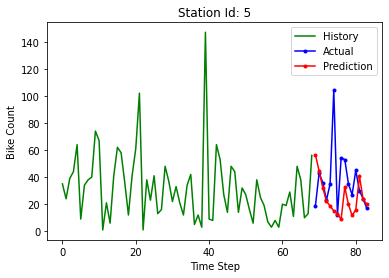

MAE: 19.259258651733397
MSE: 899.5772485773848
RMSE: 29.99295331536034
RMAE: 4.388537188145202
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/1593474360.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

2/2 [==============================] - 4s 617ms/step - loss: 1.3141 - val_loss: 0.5159
Epoch 2/20
2/2 [==============================] - 0s 26ms/step - loss: 1.1700 - val_loss: 0.6309
Epoch 3/20
2/2 [==============================] - 0s 25ms/step - loss: 0.9850 - val_loss: 0.6477
Epoch 4/20
2/2 [==============================] - 0s 27ms/step - loss: 1.1139 - val_loss: 0.6200
Epoch 5/20
2/2 [==============================] - 0s 31ms/step - loss: 0.9839 - val_loss: 0.6229
Epoch 6/20
2/2 [==============================] - 0s 31ms/step - loss: 0.9563 - val_loss: 0.6366
Epoch 7/20
2/2 [==============================] - 0s 28ms/step - loss: 0.9025 - val_loss: 0.6225
Epoch 8/20
2/2 [==============================] - 0s 27ms/step - loss: 0.8525 - val_loss: 0.5947
Epoch 9/20
2/2 [==============================] - 0s 29ms/step - loss: 0.8058 - val_loss: 0.5887
Epoch 10/20
2/2 [==============================] - 0s 27ms/step - loss: 0.8537 - val_loss: 0.5925
Epoch 11/20
2/2 [======================

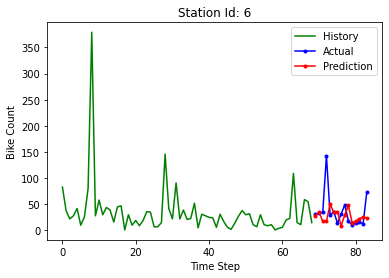

MAE: 22.643854649861655
MSE: 1429.6821322838143
RMSE: 37.81113767507947
RMAE: 4.758555941655163
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/1593474360.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

2/2 [==============================] - 4s 1000ms/step - loss: 1.1543 - val_loss: 0.5824
Epoch 2/20
2/2 [==============================] - 0s 31ms/step - loss: 1.0368 - val_loss: 0.5835
Epoch 3/20
2/2 [==============================] - 0s 32ms/step - loss: 1.0599 - val_loss: 0.6695
Epoch 4/20
2/2 [==============================] - 0s 33ms/step - loss: 0.9663 - val_loss: 0.7937
Epoch 5/20
2/2 [==============================] - 0s 31ms/step - loss: 1.0354 - val_loss: 0.8243
Epoch 6/20
2/2 [==============================] - 0s 30ms/step - loss: 0.8798 - val_loss: 0.7330
Epoch 7/20
2/2 [==============================] - 0s 36ms/step - loss: 1.0571 - val_loss: 0.6193
Epoch 8/20
2/2 [==============================] - 0s 33ms/step - loss: 0.8671 - val_loss: 0.5520
Epoch 9/20
2/2 [==============================] - 0s 31ms/step - loss: 0.8213 - val_loss: 0.5213
Epoch 10/20
2/2 [==============================] - 0s 33ms/step - loss: 0.7940 - val_loss: 0.5008
Epoch 11/20
2/2 [=====================

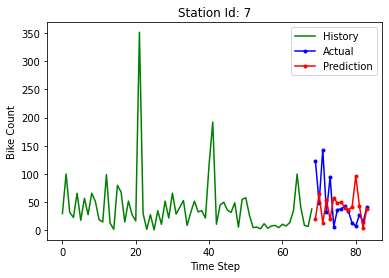

MAE: 37.90673637390137
MSE: 3023.6383110760494
RMSE: 54.98761961638319
RMAE: 6.156844676772459
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/1593474360.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

2/2 [==============================] - 4s 670ms/step - loss: 1.4623 - val_loss: 0.1485
Epoch 2/20
2/2 [==============================] - 0s 29ms/step - loss: 1.1207 - val_loss: 0.0796
Epoch 3/20
2/2 [==============================] - 0s 27ms/step - loss: 1.0820 - val_loss: 0.0821
Epoch 4/20
2/2 [==============================] - 0s 35ms/step - loss: 1.1055 - val_loss: 0.1011
Epoch 5/20
2/2 [==============================] - 0s 34ms/step - loss: 1.0619 - val_loss: 0.1945
Epoch 6/20
2/2 [==============================] - 0s 34ms/step - loss: 0.9601 - val_loss: 0.2839
Epoch 7/20
2/2 [==============================] - 0s 33ms/step - loss: 1.0546 - val_loss: 0.2551
Epoch 8/20
2/2 [==============================] - 0s 35ms/step - loss: 0.8137 - val_loss: 0.2219
Epoch 9/20
2/2 [==============================] - 0s 34ms/step - loss: 0.8533 - val_loss: 0.2141
Epoch 10/20
2/2 [==============================] - 0s 35ms/step - loss: 0.7278 - val_loss: 0.2377
Epoch 11/20
2/2 [======================

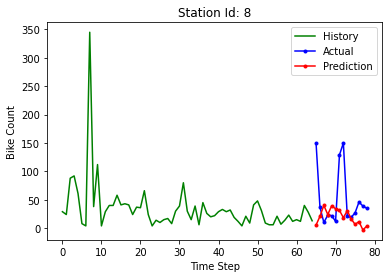

MAE: 42.95078842980521
MSE: 3868.7314666898856
RMSE: 62.19912753961976
RMAE: 6.553685103039755
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/1593474360.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

2/2 [==============================] - 4s 681ms/step - loss: 1.5692 - val_loss: 1.3541
Epoch 2/20
2/2 [==============================] - 0s 31ms/step - loss: 1.0648 - val_loss: 1.6302
Epoch 3/20
2/2 [==============================] - 0s 32ms/step - loss: 1.0295 - val_loss: 1.6430
Epoch 4/20
2/2 [==============================] - 0s 32ms/step - loss: 1.0933 - val_loss: 1.4464
Epoch 5/20
2/2 [==============================] - 0s 34ms/step - loss: 0.9574 - val_loss: 1.2858
Epoch 6/20
2/2 [==============================] - 0s 32ms/step - loss: 0.8225 - val_loss: 1.2095
Epoch 7/20
2/2 [==============================] - 0s 31ms/step - loss: 0.9827 - val_loss: 1.1663
Epoch 8/20
2/2 [==============================] - 0s 34ms/step - loss: 0.8529 - val_loss: 1.1310
Epoch 9/20
2/2 [==============================] - 0s 35ms/step - loss: 0.7772 - val_loss: 1.0956
Epoch 10/20
2/2 [==============================] - 0s 37ms/step - loss: 0.7304 - val_loss: 1.0799
Epoch 11/20
2/2 [======================

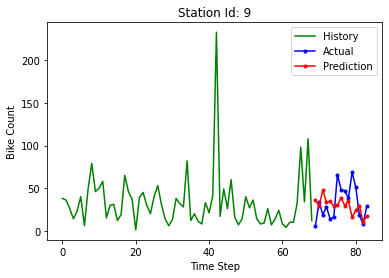

MAE: 18.297580846150716
MSE: 526.2012757676259
RMSE: 22.939077482924763
RMAE: 4.277567164423104

Error Calculation
Average MAE: 21.158560313724337
Average MSE: 1178.1845744869993
Average RMSE: 29.688565413638656
Average RMAE: 4.289662018617379


In [19]:
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(1, no_station):  
    # split into train and test sets
    train_size = int(len(df[i]) * 0.8)
    test_size = len(df[i]) - train_size

    train, test = df[i].iloc[0:train_size], df[i].iloc[train_size:len(df[i])]

    from sklearn.preprocessing import StandardScaler
    f_transformer = StandardScaler()
    feature_columns = ['avg_temp', 'avg_temp_feel', 'avg_humidity', 'avg_windSpeed']
    f_transformer = f_transformer.fit(train[feature_columns].to_numpy())
    train.loc[:, feature_columns] = f_transformer.transform(train[feature_columns].to_numpy())

    total_transformer = StandardScaler()
    total_transformer = total_transformer.fit(train[['In']])
    train['In'] = total_transformer.transform(train[['In']])
    test.loc[:, feature_columns] = f_transformer.transform(test[feature_columns].to_numpy())
    test['In'] = total_transformer.transform(test[['In']])

    time_steps = 3
    X_train, y_train = createDataset(train, train['In'], time_steps)
    X_test, y_test = createDataset(test, test['In'], time_steps)
    
    from tensorflow.keras import layers

    LSTM_model = keras.Sequential()
    LSTM_model.add(
      layers.Bidirectional(
        layers.LSTM(
          units = 128, 
          input_shape = (X_train.shape[1], X_train.shape[2])
        )
      )
    )
    LSTM_model.add(layers.Dropout(rate = 0.2))
    LSTM_model.add(layers.Dense(units = 1))

    LSTM_model.compile(loss='mean_squared_error', optimizer='adam')

    history = LSTM_model.fit(
        X_train, y_train, 
        epochs = 20, 
        batch_size = 32, 
        validation_split = 0.1,
        shuffle = False
    )
    
    y_pred = LSTM_model.predict(X_test)
    y_train_inv = total_transformer.inverse_transform(y_train.reshape(1, -1)).flatten()
    y_test_inv = total_transformer.inverse_transform(y_test.reshape(1, -1)).flatten()
    y_pred_inv = total_transformer.inverse_transform(y_pred).flatten()


    plot_graph(y_train, y_train_inv, y_test_inv, y_pred_inv, i)
    print_error_calculation(y_test_inv, y_pred_inv)
    totalMAE += get_MAE(y_test_inv, y_pred_inv)
    totalMSE += get_MSE(y_test_inv, y_pred_inv)
    totalRMAE += get_RMSE(y_test_inv, y_pred_inv)
    totalRMSE += get_RMAE(y_test_inv, y_pred_inv)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)

## MinMaxScalar

Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/1132901758.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

2/2 [==============================] - 4s 1s/step - loss: 0.3926 - val_loss: 0.2139
Epoch 2/20
2/2 [==============================] - 0s 40ms/step - loss: 0.2119 - val_loss: 0.1935
Epoch 3/20
2/2 [==============================] - 0s 44ms/step - loss: 0.2367 - val_loss: 0.1371
Epoch 4/20
2/2 [==============================] - 0s 42ms/step - loss: 0.1817 - val_loss: 0.1602
Epoch 5/20
2/2 [==============================] - 0s 38ms/step - loss: 0.1711 - val_loss: 0.1494
Epoch 6/20
2/2 [==============================] - 0s 36ms/step - loss: 0.2360 - val_loss: 0.1191
Epoch 7/20
2/2 [==============================] - 0s 39ms/step - loss: 0.1349 - val_loss: 0.1278
Epoch 8/20
2/2 [==============================] - 0s 41ms/step - loss: 0.1983 - val_loss: 0.1493
Epoch 9/20
2/2 [==============================] - 0s 38ms/step - loss: 0.1686 - val_loss: 0.1539
Epoch 10/20
2/2 [==============================] - 0s 39ms/step - loss: 0.1819 - val_loss: 0.1295
Epoch 11/20
2/2 [=========================

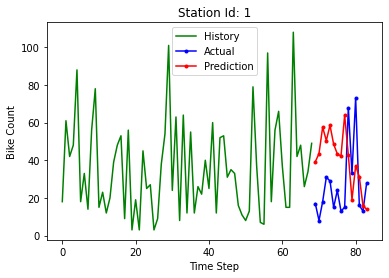

MAE: 25.63048973083496
MSE: 791.4673557248977
RMSE: 28.133029622223372
RMAE: 5.062656390753273
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/1132901758.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

2/2 [==============================] - 4s 716ms/step - loss: 0.2272 - val_loss: 0.1707
Epoch 2/20
2/2 [==============================] - 0s 29ms/step - loss: 0.1358 - val_loss: 0.1737
Epoch 3/20
2/2 [==============================] - 0s 31ms/step - loss: 0.1058 - val_loss: 0.1598
Epoch 4/20
2/2 [==============================] - 0s 32ms/step - loss: 0.1212 - val_loss: 0.1176
Epoch 5/20
2/2 [==============================] - 0s 30ms/step - loss: 0.0621 - val_loss: 0.1418
Epoch 6/20
2/2 [==============================] - 0s 32ms/step - loss: 0.1083 - val_loss: 0.1734
Epoch 7/20
2/2 [==============================] - 0s 34ms/step - loss: 0.1155 - val_loss: 0.2207
Epoch 8/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0838 - val_loss: 0.2259
Epoch 9/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0896 - val_loss: 0.1761
Epoch 10/20
2/2 [==============================] - 0s 30ms/step - loss: 0.0960 - val_loss: 0.1529
Epoch 11/20
2/2 [======================

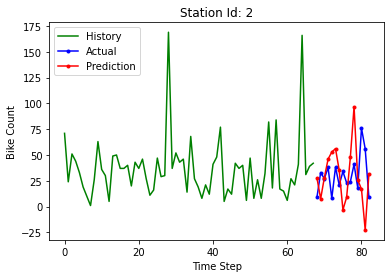

MAE: 28.651839160919188
MSE: 1275.6239308358827
RMSE: 35.71587785335652
RMAE: 5.352741275357813
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/1132901758.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

2/2 [==============================] - 5s 776ms/step - loss: 0.1757 - val_loss: 0.2088
Epoch 2/20
2/2 [==============================] - 0s 30ms/step - loss: 0.1253 - val_loss: 0.2140
Epoch 3/20
2/2 [==============================] - 0s 34ms/step - loss: 0.1168 - val_loss: 0.2602
Epoch 4/20
2/2 [==============================] - 0s 35ms/step - loss: 0.1240 - val_loss: 0.2629
Epoch 5/20
2/2 [==============================] - 0s 34ms/step - loss: 0.1065 - val_loss: 0.2556
Epoch 6/20
2/2 [==============================] - 0s 39ms/step - loss: 0.1025 - val_loss: 0.2578
Epoch 7/20
2/2 [==============================] - 0s 39ms/step - loss: 0.1126 - val_loss: 0.2693
Epoch 8/20
2/2 [==============================] - 0s 32ms/step - loss: 0.1355 - val_loss: 0.2677
Epoch 9/20
2/2 [==============================] - 0s 30ms/step - loss: 0.0872 - val_loss: 0.2477
Epoch 10/20
2/2 [==============================] - 0s 28ms/step - loss: 0.0875 - val_loss: 0.2286
Epoch 11/20
2/2 [======================

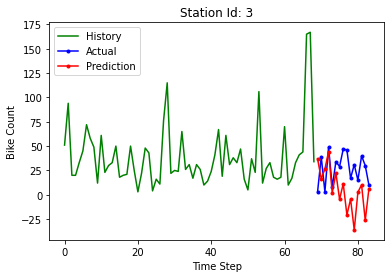

MAE: 28.644813140233357
MSE: 1232.4255039604088
RMSE: 35.10591836087483
RMAE: 5.352084933951755
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/1132901758.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

2/2 [==============================] - 5s 1s/step - loss: 0.3034 - val_loss: 0.1149
Epoch 2/20
2/2 [==============================] - 0s 32ms/step - loss: 0.2687 - val_loss: 0.1113
Epoch 3/20
2/2 [==============================] - 0s 30ms/step - loss: 0.1807 - val_loss: 0.0815
Epoch 4/20
2/2 [==============================] - 0s 28ms/step - loss: 0.1305 - val_loss: 0.1701
Epoch 5/20
2/2 [==============================] - 0s 29ms/step - loss: 0.2137 - val_loss: 0.1947
Epoch 6/20
2/2 [==============================] - 0s 32ms/step - loss: 0.1250 - val_loss: 0.1514
Epoch 7/20
2/2 [==============================] - 0s 35ms/step - loss: 0.1160 - val_loss: 0.1302
Epoch 8/20
2/2 [==============================] - 0s 37ms/step - loss: 0.1374 - val_loss: 0.1313
Epoch 9/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0969 - val_loss: 0.1589
Epoch 10/20
2/2 [==============================] - 0s 37ms/step - loss: 0.1230 - val_loss: 0.2021
Epoch 11/20
2/2 [=========================

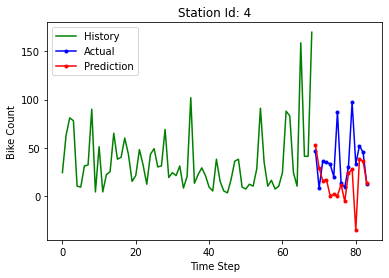

MAE: 25.848977097868918
MSE: 1345.8514741521656
RMSE: 36.68584841805033
RMAE: 5.084188932157116
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/1132901758.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

2/2 [==============================] - 4s 785ms/step - loss: 0.3465 - val_loss: 0.0693
Epoch 2/20
2/2 [==============================] - 0s 32ms/step - loss: 0.1943 - val_loss: 0.0652
Epoch 3/20
2/2 [==============================] - 0s 34ms/step - loss: 0.1971 - val_loss: 0.0203
Epoch 4/20
2/2 [==============================] - 0s 30ms/step - loss: 0.1584 - val_loss: 0.0530
Epoch 5/20
2/2 [==============================] - 0s 31ms/step - loss: 0.1675 - val_loss: 0.0346
Epoch 6/20
2/2 [==============================] - 0s 36ms/step - loss: 0.1131 - val_loss: 0.0157
Epoch 7/20
2/2 [==============================] - 0s 37ms/step - loss: 0.1389 - val_loss: 0.0334
Epoch 8/20
2/2 [==============================] - 0s 32ms/step - loss: 0.1604 - val_loss: 0.0350
Epoch 9/20
2/2 [==============================] - 0s 32ms/step - loss: 0.0787 - val_loss: 0.0206
Epoch 10/20
2/2 [==============================] - 0s 37ms/step - loss: 0.1191 - val_loss: 0.0222
Epoch 11/20
2/2 [======================

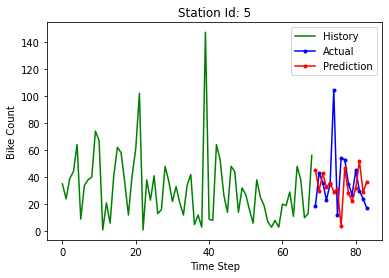

MAE: 18.50157364209493
MSE: 709.5400504143432
RMSE: 26.637192990522543
RMAE: 4.30134556180911
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/1132901758.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

2/2 [==============================] - 5s 770ms/step - loss: 0.1718 - val_loss: 0.0621
Epoch 2/20
2/2 [==============================] - 0s 31ms/step - loss: 0.1354 - val_loss: 0.0516
Epoch 3/20
2/2 [==============================] - 0s 38ms/step - loss: 0.1143 - val_loss: 0.0564
Epoch 4/20
2/2 [==============================] - 0s 62ms/step - loss: 0.1267 - val_loss: 0.0448
Epoch 5/20
2/2 [==============================] - 0s 50ms/step - loss: 0.1056 - val_loss: 0.0626
Epoch 6/20
2/2 [==============================] - 0s 42ms/step - loss: 0.1159 - val_loss: 0.0554
Epoch 7/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0861 - val_loss: 0.0450
Epoch 8/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0857 - val_loss: 0.0473
Epoch 9/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0771 - val_loss: 0.0472
Epoch 10/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1021 - val_loss: 0.0437
Epoch 11/20
2/2 [======================

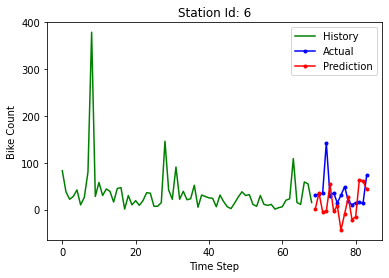

MAE: 41.21324888070424
MSE: 2838.386515023921
RMSE: 53.27650997413326
RMAE: 6.419754581033783
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/1132901758.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

2/2 [==============================] - 5s 1s/step - loss: 0.1596 - val_loss: 0.1151
Epoch 2/20
2/2 [==============================] - 0s 39ms/step - loss: 0.1322 - val_loss: 0.0294
Epoch 3/20
2/2 [==============================] - 0s 39ms/step - loss: 0.1091 - val_loss: 0.0300
Epoch 4/20
2/2 [==============================] - 0s 40ms/step - loss: 0.1206 - val_loss: 0.0256
Epoch 5/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0822 - val_loss: 0.0746
Epoch 6/20
2/2 [==============================] - 0s 40ms/step - loss: 0.1232 - val_loss: 0.0668
Epoch 7/20
2/2 [==============================] - 0s 39ms/step - loss: 0.1255 - val_loss: 0.0212
Epoch 8/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0730 - val_loss: 0.0187
Epoch 9/20
2/2 [==============================] - 0s 37ms/step - loss: 0.1220 - val_loss: 0.0192
Epoch 10/20
2/2 [==============================] - 0s 34ms/step - loss: 0.0951 - val_loss: 0.0215
Epoch 11/20
2/2 [=========================

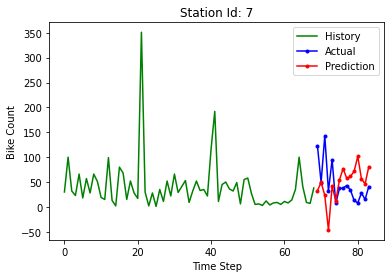

MAE: 46.44271348317464
MSE: 3322.490486358471
RMSE: 57.64104862299498
RMAE: 6.814889102778903
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/1132901758.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

2/2 [==============================] - 5s 857ms/step - loss: 0.2557 - val_loss: 0.0528
Epoch 2/20
2/2 [==============================] - 0s 39ms/step - loss: 0.1782 - val_loss: 0.0400
Epoch 3/20
2/2 [==============================] - 0s 38ms/step - loss: 0.1464 - val_loss: 0.0241
Epoch 4/20
2/2 [==============================] - 0s 35ms/step - loss: 0.1329 - val_loss: 0.0517
Epoch 5/20
2/2 [==============================] - 0s 36ms/step - loss: 0.1554 - val_loss: 0.0281
Epoch 6/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0911 - val_loss: 0.0203
Epoch 7/20
2/2 [==============================] - 0s 41ms/step - loss: 0.1043 - val_loss: 0.0473
Epoch 8/20
2/2 [==============================] - 0s 40ms/step - loss: 0.1202 - val_loss: 0.0378
Epoch 9/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0848 - val_loss: 0.0102
Epoch 10/20
2/2 [==============================] - 0s 36ms/step - loss: 0.1153 - val_loss: 0.0076
Epoch 11/20
2/2 [======================

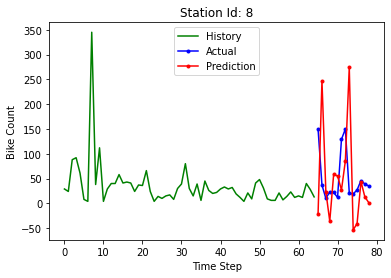

MAE: 82.63212874957493
MSE: 12231.719577710464
RMSE: 110.59710474379727
RMAE: 9.090221600685812
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/1132901758.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A valu

2/2 [==============================] - 5s 743ms/step - loss: 0.2609 - val_loss: 0.0788
Epoch 2/20
2/2 [==============================] - 0s 37ms/step - loss: 0.1574 - val_loss: 0.0561
Epoch 3/20
2/2 [==============================] - 0s 36ms/step - loss: 0.1629 - val_loss: 0.0509
Epoch 4/20
2/2 [==============================] - 0s 35ms/step - loss: 0.1342 - val_loss: 0.0653
Epoch 5/20
2/2 [==============================] - 0s 34ms/step - loss: 0.1107 - val_loss: 0.0393
Epoch 6/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0979 - val_loss: 0.0284
Epoch 7/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0724 - val_loss: 0.0481
Epoch 8/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1039 - val_loss: 0.0680
Epoch 9/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0769 - val_loss: 0.0768
Epoch 10/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1008 - val_loss: 0.0664
Epoch 11/20
2/2 [======================

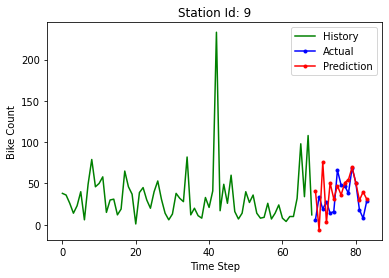

MAE: 20.453695058822632
MSE: 682.6878542765539
RMSE: 26.128296046174803
RMAE: 4.5225761529047395

Error Calculation
Average MAE: 31.801947894422778
Average MSE: 2443.019274845711
Average RMSE: 40.99208266321279
Average RMAE: 5.200045853143231


In [20]:
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(1, no_station):  
    # split into train and test sets
    train_size = int(len(df[i]) * 0.8)
    test_size = len(df[i]) - train_size

    train, test = df[i].iloc[0:train_size], df[i].iloc[train_size:len(df[i])]

    from sklearn.preprocessing import MinMaxScaler
    f_transformer = MinMaxScaler()
    feature_columns = ['avg_temp', 'avg_temp_feel', 'avg_humidity', 'avg_windSpeed']
    f_transformer = f_transformer.fit(train[feature_columns].to_numpy())
    train.loc[:, feature_columns] = f_transformer.transform(train[feature_columns].to_numpy())

    total_transformer = MinMaxScaler()
    total_transformer = total_transformer.fit(train[['In']])
    train['In'] = total_transformer.transform(train[['In']])
    test.loc[:, feature_columns] = f_transformer.transform(test[feature_columns].to_numpy())
    test['In'] = total_transformer.transform(test[['In']])

    time_steps = 3
    X_train, y_train = createDataset(train, train['In'], time_steps)
    X_test, y_test = createDataset(test, test['In'], time_steps)
    
    from tensorflow.keras import layers

    LSTM_model = keras.Sequential()
    LSTM_model.add(
      layers.Bidirectional(
        layers.LSTM(
          units = 128, 
          input_shape = (X_train.shape[1], X_train.shape[2])
        )
      )
    )
    LSTM_model.add(layers.Dropout(rate = 0.2))
    LSTM_model.add(layers.Dense(units = 1))

    LSTM_model.compile(loss='mean_squared_error', optimizer='adam')

    history = LSTM_model.fit(
        X_train, y_train, 
        epochs = 20, 
        batch_size = 32, 
        validation_split = 0.1,
        shuffle = False
    )
    
    y_pred = LSTM_model.predict(X_test)
    y_train_inv = total_transformer.inverse_transform(y_train.reshape(1, -1)).flatten()
    y_test_inv = total_transformer.inverse_transform(y_test.reshape(1, -1)).flatten()
    y_pred_inv = total_transformer.inverse_transform(y_pred).flatten()


    plot_graph(y_train, y_train_inv, y_test_inv, y_pred_inv, i)
    print_error_calculation(y_test_inv, y_pred_inv)
    totalMAE += get_MAE(y_test_inv, y_pred_inv)
    totalMSE += get_MSE(y_test_inv, y_pred_inv)
    totalRMAE += get_RMSE(y_test_inv, y_pred_inv)
    totalRMSE += get_RMAE(y_test_inv, y_pred_inv)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)

# RobustScaler

Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/387868806.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value

2/2 [==============================] - 5s 1s/step - loss: 0.6315 - val_loss: 0.8879
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 0.5160 - val_loss: 0.6915
Epoch 3/20
2/2 [==============================] - 0s 41ms/step - loss: 0.4775 - val_loss: 0.7046
Epoch 4/20
2/2 [==============================] - 0s 49ms/step - loss: 0.4714 - val_loss: 0.7907
Epoch 5/20
2/2 [==============================] - 0s 50ms/step - loss: 0.3925 - val_loss: 0.8486
Epoch 6/20
2/2 [==============================] - 0s 50ms/step - loss: 0.4866 - val_loss: 0.7402
Epoch 7/20
2/2 [==============================] - 0s 50ms/step - loss: 0.3235 - val_loss: 0.6023
Epoch 8/20
2/2 [==============================] - 0s 48ms/step - loss: 0.3849 - val_loss: 0.6053
Epoch 9/20
2/2 [==============================] - 0s 44ms/step - loss: 0.3290 - val_loss: 0.7115
Epoch 10/20
2/2 [==============================] - 0s 43ms/step - loss: 0.3820 - val_loss: 0.8943
Epoch 11/20
2/2 [=========================

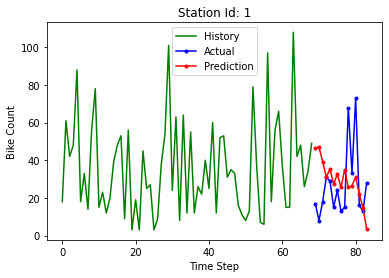

MAE: 18.168638547261555
MSE: 526.283845668714
RMSE: 22.940877177403525
RMAE: 4.262468597803573
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/387868806.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value

2/2 [==============================] - 4s 796ms/step - loss: 1.1018 - val_loss: 3.4726
Epoch 2/20
2/2 [==============================] - 0s 38ms/step - loss: 0.9753 - val_loss: 3.3625
Epoch 3/20
2/2 [==============================] - 0s 61ms/step - loss: 0.7972 - val_loss: 3.2254
Epoch 4/20
2/2 [==============================] - 0s 43ms/step - loss: 0.7475 - val_loss: 3.1477
Epoch 5/20
2/2 [==============================] - 0s 37ms/step - loss: 0.7349 - val_loss: 3.1353
Epoch 6/20
2/2 [==============================] - 0s 39ms/step - loss: 0.6402 - val_loss: 3.1793
Epoch 7/20
2/2 [==============================] - 0s 41ms/step - loss: 0.7217 - val_loss: 3.2491
Epoch 8/20
2/2 [==============================] - 0s 37ms/step - loss: 0.7629 - val_loss: 3.3537
Epoch 9/20
2/2 [==============================] - 0s 34ms/step - loss: 0.5831 - val_loss: 3.3752
Epoch 10/20
2/2 [==============================] - 0s 34ms/step - loss: 0.5760 - val_loss: 3.3226
Epoch 11/20
2/2 [======================

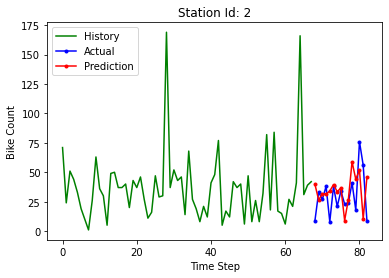

MAE: 17.252136103312175
MSE: 474.74715769514125
RMSE: 21.788693345291296
RMAE: 4.153569080117986
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/387868806.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value

2/2 [==============================] - 5s 763ms/step - loss: 0.8680 - val_loss: 6.3016
Epoch 2/20
2/2 [==============================] - 0s 38ms/step - loss: 0.6705 - val_loss: 6.4092
Epoch 3/20
2/2 [==============================] - 0s 48ms/step - loss: 0.8115 - val_loss: 6.5068
Epoch 4/20
2/2 [==============================] - 0s 42ms/step - loss: 0.5808 - val_loss: 6.4651
Epoch 5/20
2/2 [==============================] - 0s 40ms/step - loss: 0.5012 - val_loss: 6.5007
Epoch 6/20
2/2 [==============================] - 0s 41ms/step - loss: 0.5145 - val_loss: 6.7502
Epoch 7/20
2/2 [==============================] - 0s 40ms/step - loss: 0.5331 - val_loss: 6.8864
Epoch 8/20
2/2 [==============================] - 0s 41ms/step - loss: 0.4478 - val_loss: 7.0084
Epoch 9/20
2/2 [==============================] - 0s 43ms/step - loss: 0.4112 - val_loss: 7.2275
Epoch 10/20
2/2 [==============================] - 0s 47ms/step - loss: 0.3964 - val_loss: 7.3474
Epoch 11/20
2/2 [======================

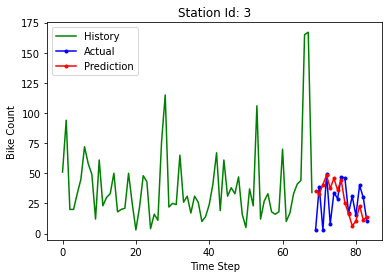

MAE: 14.49456787109375
MSE: 350.1661887593917
RMSE: 18.71272798817403
RMAE: 3.807173212646589
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/387868806.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value

2/2 [==============================] - 5s 1s/step - loss: 1.0992 - val_loss: 6.2941
Epoch 2/20
2/2 [==============================] - 0s 41ms/step - loss: 0.8888 - val_loss: 5.8850
Epoch 3/20
2/2 [==============================] - 0s 40ms/step - loss: 0.7808 - val_loss: 6.3326
Epoch 4/20
2/2 [==============================] - 0s 47ms/step - loss: 0.6927 - val_loss: 7.1632
Epoch 5/20
2/2 [==============================] - 0s 49ms/step - loss: 0.5268 - val_loss: 7.8953
Epoch 6/20
2/2 [==============================] - 0s 45ms/step - loss: 0.6546 - val_loss: 8.1177
Epoch 7/20
2/2 [==============================] - 0s 45ms/step - loss: 0.5924 - val_loss: 7.9238
Epoch 8/20
2/2 [==============================] - 0s 42ms/step - loss: 0.5214 - val_loss: 7.5318
Epoch 9/20
2/2 [==============================] - 0s 46ms/step - loss: 0.4469 - val_loss: 7.2394
Epoch 10/20
2/2 [==============================] - 0s 48ms/step - loss: 0.4526 - val_loss: 7.2504
Epoch 11/20
2/2 [=========================

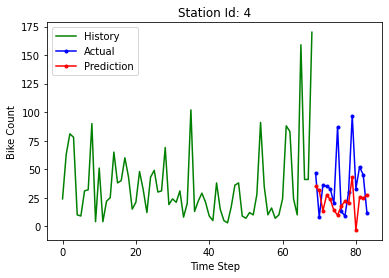

MAE: 22.579209582010904
MSE: 880.6207576682027
RMSE: 29.675254972252603
RMAE: 4.751758577833148
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/387868806.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value

2/2 [==============================] - 4s 834ms/step - loss: 1.0426 - val_loss: 0.6641
Epoch 2/20
2/2 [==============================] - 0s 37ms/step - loss: 0.8262 - val_loss: 0.7733
Epoch 3/20
2/2 [==============================] - 0s 39ms/step - loss: 0.9045 - val_loss: 0.5861
Epoch 4/20
2/2 [==============================] - 0s 42ms/step - loss: 0.7640 - val_loss: 0.4454
Epoch 5/20
2/2 [==============================] - 0s 44ms/step - loss: 0.6710 - val_loss: 0.3974
Epoch 6/20
2/2 [==============================] - 0s 47ms/step - loss: 0.5847 - val_loss: 0.3783
Epoch 7/20
2/2 [==============================] - 0s 51ms/step - loss: 0.5629 - val_loss: 0.3713
Epoch 8/20
2/2 [==============================] - 0s 51ms/step - loss: 0.6473 - val_loss: 0.3633
Epoch 9/20
2/2 [==============================] - 0s 45ms/step - loss: 0.6232 - val_loss: 0.3490
Epoch 10/20
2/2 [==============================] - 0s 40ms/step - loss: 0.4531 - val_loss: 0.3288
Epoch 11/20
2/2 [======================

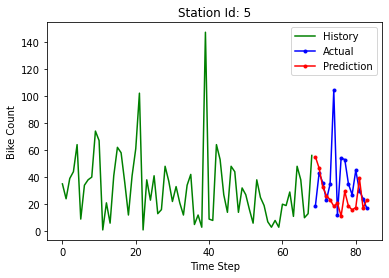

MAE: 19.70381368001302
MSE: 835.11506800096
RMSE: 28.898357531198204
RMAE: 4.438897800131585
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/387868806.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value

2/2 [==============================] - 5s 802ms/step - loss: 3.5942 - val_loss: 1.6698
Epoch 2/20
2/2 [==============================] - 0s 35ms/step - loss: 3.4192 - val_loss: 1.7446
Epoch 3/20
2/2 [==============================] - 0s 41ms/step - loss: 3.2279 - val_loss: 1.8434
Epoch 4/20
2/2 [==============================] - 0s 39ms/step - loss: 3.3348 - val_loss: 1.8847
Epoch 5/20
2/2 [==============================] - 0s 38ms/step - loss: 3.2633 - val_loss: 1.9128
Epoch 6/20
2/2 [==============================] - 0s 36ms/step - loss: 3.0228 - val_loss: 1.9791
Epoch 7/20
2/2 [==============================] - 0s 35ms/step - loss: 2.8282 - val_loss: 2.0819
Epoch 8/20
2/2 [==============================] - 0s 39ms/step - loss: 2.9467 - val_loss: 2.1673
Epoch 9/20
2/2 [==============================] - 0s 42ms/step - loss: 2.8420 - val_loss: 2.2105
Epoch 10/20
2/2 [==============================] - 0s 41ms/step - loss: 2.6333 - val_loss: 2.2277
Epoch 11/20
2/2 [======================

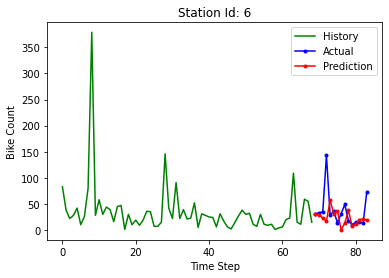

MAE: 23.779608472188315
MSE: 1536.6264690775902
RMSE: 39.19982741132402
RMAE: 4.8764339913699555
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/387868806.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value

2/2 [==============================] - 4s 969ms/step - loss: 1.9922 - val_loss: 0.7529
Epoch 2/20
2/2 [==============================] - 0s 29ms/step - loss: 1.6572 - val_loss: 0.6925
Epoch 3/20
2/2 [==============================] - 0s 29ms/step - loss: 1.5905 - val_loss: 0.6823
Epoch 4/20
2/2 [==============================] - 0s 33ms/step - loss: 1.6630 - val_loss: 0.6991
Epoch 5/20
2/2 [==============================] - 0s 33ms/step - loss: 1.5164 - val_loss: 0.7308
Epoch 6/20
2/2 [==============================] - 0s 36ms/step - loss: 1.5149 - val_loss: 0.7400
Epoch 7/20
2/2 [==============================] - 0s 39ms/step - loss: 1.4702 - val_loss: 0.7259
Epoch 8/20
2/2 [==============================] - 0s 45ms/step - loss: 1.4264 - val_loss: 0.6980
Epoch 9/20
2/2 [==============================] - 0s 39ms/step - loss: 1.1868 - val_loss: 0.6707
Epoch 10/20
2/2 [==============================] - 0s 39ms/step - loss: 1.2149 - val_loss: 0.6665
Epoch 11/20
2/2 [======================

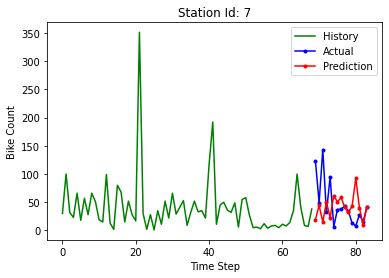

MAE: 36.78469785054525
MSE: 2969.453655614884
RMSE: 54.49269359845303
RMAE: 6.065038981782825
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/387868806.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value

2/2 [==============================] - 4s 683ms/step - loss: 3.2382 - val_loss: 1.3431
Epoch 2/20
2/2 [==============================] - 0s 25ms/step - loss: 2.8409 - val_loss: 0.6722
Epoch 3/20
2/2 [==============================] - 0s 25ms/step - loss: 2.6167 - val_loss: 0.4631
Epoch 4/20
2/2 [==============================] - 0s 24ms/step - loss: 2.7198 - val_loss: 0.4689
Epoch 5/20
2/2 [==============================] - 0s 28ms/step - loss: 2.5885 - val_loss: 0.6021
Epoch 6/20
2/2 [==============================] - 0s 29ms/step - loss: 2.2831 - val_loss: 0.8355
Epoch 7/20
2/2 [==============================] - 0s 27ms/step - loss: 2.1125 - val_loss: 1.0215
Epoch 8/20
2/2 [==============================] - 0s 28ms/step - loss: 2.3523 - val_loss: 1.0612
Epoch 9/20
2/2 [==============================] - 0s 33ms/step - loss: 2.0542 - val_loss: 0.9204
Epoch 10/20
2/2 [==============================] - 0s 27ms/step - loss: 2.0647 - val_loss: 0.7393
Epoch 11/20
2/2 [======================

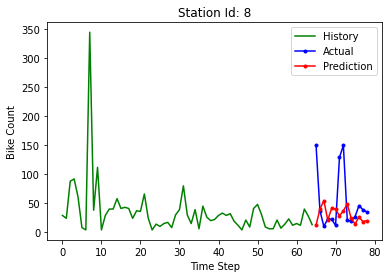

MAE: 39.209693227495464
MSE: 3361.662313148525
RMSE: 57.97984402487234
RMAE: 6.261764386137142
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_11097/387868806.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value

2/2 [==============================] - 5s 837ms/step - loss: 2.0943 - val_loss: 2.2698
Epoch 2/20
2/2 [==============================] - 0s 47ms/step - loss: 1.6027 - val_loss: 2.4893
Epoch 3/20
2/2 [==============================] - 0s 47ms/step - loss: 1.5550 - val_loss: 2.4253
Epoch 4/20
2/2 [==============================] - 0s 47ms/step - loss: 1.3614 - val_loss: 2.1947
Epoch 5/20
2/2 [==============================] - 0s 45ms/step - loss: 1.5123 - val_loss: 1.9561
Epoch 6/20
2/2 [==============================] - 0s 44ms/step - loss: 1.2966 - val_loss: 1.8291
Epoch 7/20
2/2 [==============================] - 0s 44ms/step - loss: 1.4056 - val_loss: 1.7813
Epoch 8/20
2/2 [==============================] - 0s 45ms/step - loss: 1.3470 - val_loss: 1.7611
Epoch 9/20
2/2 [==============================] - 0s 46ms/step - loss: 1.3345 - val_loss: 1.7602
Epoch 10/20
2/2 [==============================] - 0s 49ms/step - loss: 1.2154 - val_loss: 1.7830
Epoch 11/20
2/2 [======================

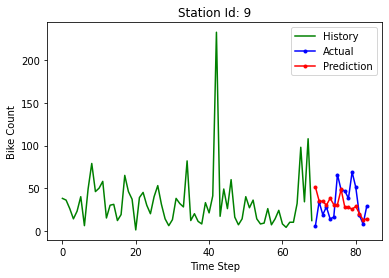

MAE: 17.078443082173667
MSE: 497.92695974761716
RMSE: 22.314277038425807
RMAE: 4.132607298325558

Error Calculation
Average MAE: 20.90508084160941
Average MSE: 1143.2602415381027
Average RMSE: 29.600255308739484
Average RMAE: 4.274971192614837


In [21]:
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(1, no_station):  
    # split into train and test sets
    train_size = int(len(df[i]) * 0.8)
    test_size = len(df[i]) - train_size

    train, test = df[i].iloc[0:train_size], df[i].iloc[train_size:len(df[i])]

    from sklearn.preprocessing import RobustScaler
    f_transformer = RobustScaler()
    feature_columns = ['avg_temp', 'avg_temp_feel', 'avg_humidity', 'avg_windSpeed']
    f_transformer = f_transformer.fit(train[feature_columns].to_numpy())
    train.loc[:, feature_columns] = f_transformer.transform(train[feature_columns].to_numpy())

    total_transformer = RobustScaler()
    total_transformer = total_transformer.fit(train[['In']])
    train['In'] = total_transformer.transform(train[['In']])
    test.loc[:, feature_columns] = f_transformer.transform(test[feature_columns].to_numpy())
    test['In'] = total_transformer.transform(test[['In']])

    time_steps = 3
    X_train, y_train = createDataset(train, train['In'], time_steps)
    X_test, y_test = createDataset(test, test['In'], time_steps)
    
    from tensorflow.keras import layers

    LSTM_model = keras.Sequential()
    LSTM_model.add(
      layers.Bidirectional(
        layers.LSTM(
          units = 128, 
          input_shape = (X_train.shape[1], X_train.shape[2])
        )
      )
    )
    LSTM_model.add(layers.Dropout(rate = 0.2))
    LSTM_model.add(layers.Dense(units = 1))

    LSTM_model.compile(loss='mean_squared_error', optimizer='adam')

    history = LSTM_model.fit(
        X_train, y_train, 
        epochs = 20, 
        batch_size = 32, 
        validation_split = 0.1,
        shuffle = False
    )
    
    y_pred = LSTM_model.predict(X_test)
    y_train_inv = total_transformer.inverse_transform(y_train.reshape(1, -1)).flatten()
    y_test_inv = total_transformer.inverse_transform(y_test.reshape(1, -1)).flatten()
    y_pred_inv = total_transformer.inverse_transform(y_pred).flatten()


    plot_graph(y_train, y_train_inv, y_test_inv, y_pred_inv, i)
    print_error_calculation(y_test_inv, y_pred_inv)
    totalMAE += get_MAE(y_test_inv, y_pred_inv)
    totalMSE += get_MSE(y_test_inv, y_pred_inv)
    totalRMAE += get_RMSE(y_test_inv, y_pred_inv)
    totalRMSE += get_RMAE(y_test_inv, y_pred_inv)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)